

**Name**: Predicting delivery time <br> <br>

**Description** : Kaggle competition 5 hours -- truck delivery time

**Author:** Pierre Mulliez <br>

**Contact:** <br>  pierremulliez@student.ie.edu <br> 
 

**Code created:** 2021-03-12 <br>

**Last updated:** 2021-03-12

In [14]:
#import the necessary packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import scipy
import re
from datetime import datetime as dttime
from datetime import date
import calendar
from math import sin, cos, sqrt, atan2, radians
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from dateutil.relativedelta import *
from sklearn import metrics
pd.set_option('display.max_columns', None)

In [15]:
#import the dataset as a panda dataframe 
df = pd.read_csv("train_main.csv")
df_t = pd.read_csv("test_main.csv")

<div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Sampling and performance definition </div> 

In [16]:
#assigning df to another var / avoid reloading the dataset if an eroor arises 
df1 = df.copy()

In [17]:
df1.head()

,id,starting_time,model_van,num_packages,delivery_time
0,1,2016-04-14 20:53:00,model_A,3,448
1,2,2016-05-30 23:12:00,model_B,1,784
2,3,2016-03-03 11:54:00,model_B,1,844
3,4,2016-05-02 12:34:00,model_A,1,2076
4,5,2016-03-02 15:53:00,model_A,1,1289


In [18]:
df_t.head()
df_t['delivery_time'] = 769


In [19]:
#submitting sample result with delivery time mean
dt_t1 = df_t.loc[:,['id','delivery_time']]
dt_t1
#dt_t1.to_csv(r'C:\Users\Pierre Computer\Documents\IE_classes\comptetition_data\sub2.csv', index = False)

,id,delivery_time
0,8495,769
1,8496,769
2,8497,769
3,8498,769
4,8499,769
...,...,...
8491,16986,769
8492,16987,769
8493,16988,769
8494,16989,769


In [20]:
#Describe qualitative features of the dataset
df.describe(include=[object]).T

,count,unique,top,freq
starting_time,8494,6828,2016-05-31 14:52:00,6
model_van,8494,2,model_A,4636


In [21]:
#Describe quantitative features of the dataset
df.describe(exclude=[np.object]).T

,count,mean,std,min,25%,50%,75%,max
id,8494.0,4247.500000,2452.150927,1.0,2124.25,4247.5,6370.75,8494.0
num_packages,8494.0,1.687073,1.331989,1.0,1.00,1.0,2.00,6.0
delivery_time,8494.0,769.416765,513.649159,60.0,388.00,641.5,1018.00,3300.0


<center> With regards to quantitative features, there are some features that have no recordings. It would be interesting to identify the percentage of nulls or insignificant values with respect to the entire dataset. In this EDA we will do this analysis.</center>
<p> <center> In the table above, numerical features don't follow a normally distributed dataset, meaning that potentially there could be outliers. It is therefore that we will perform a skweness test and identify outliers on the different features.</center> </p>

In [22]:
size = df1.shape
print("Size of the Dataframe -> {}".format(size))

Size of the Dataframe -> (8494, 5)


## Correlations amongst variables

Text(0.5, 1.0, 'Correlation Heatmap on RBA')

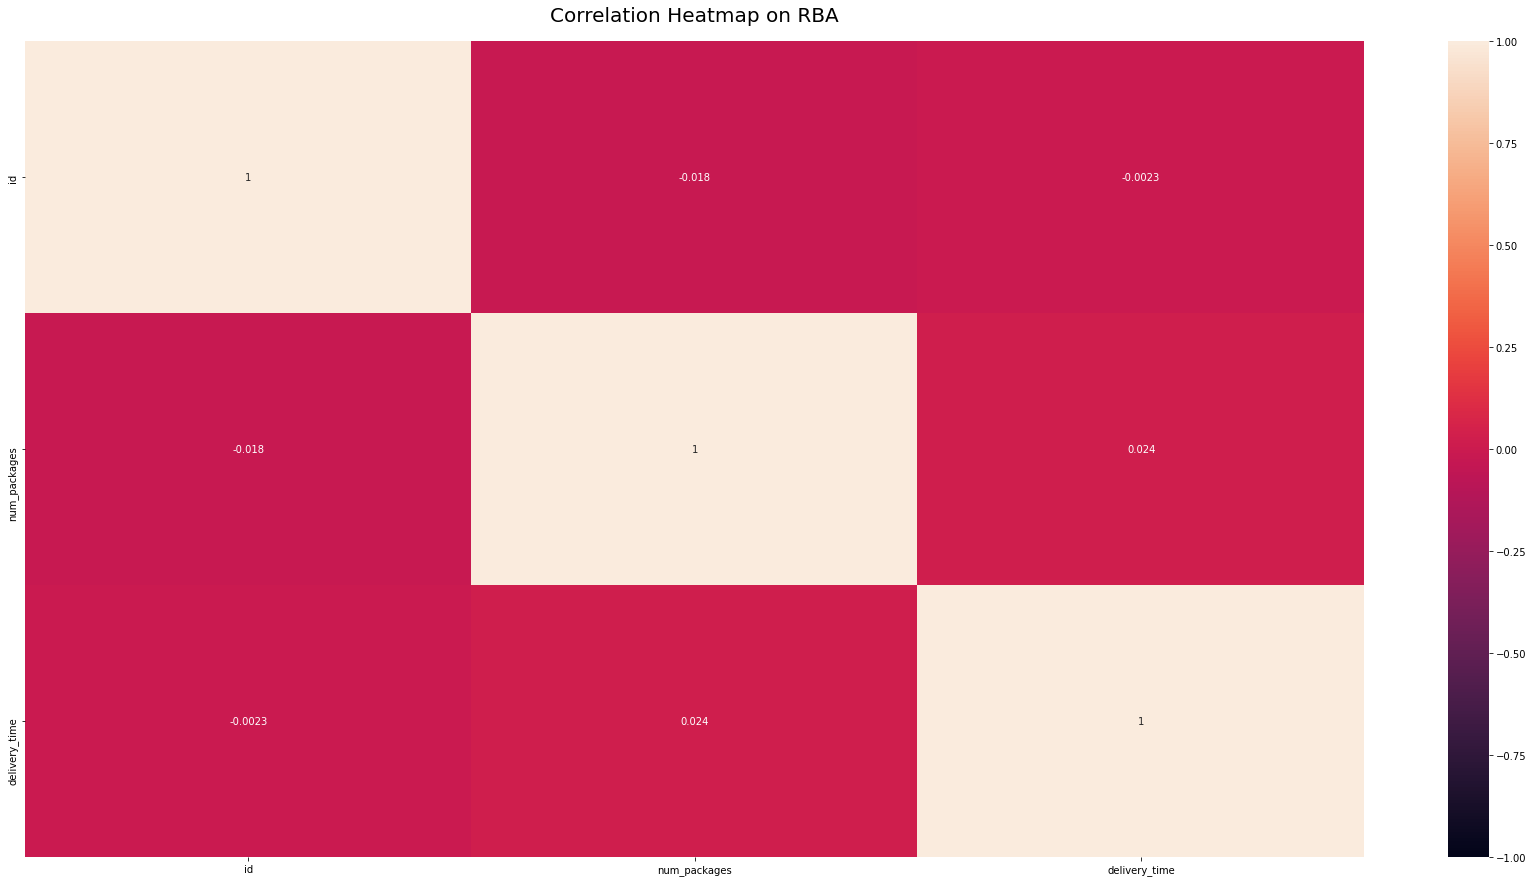

In [23]:
plt.figure(figsize=(30,15))
heatmap=sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap on RBA', fontdict={'fontsize':20},pad=20)

## Visualise the variables 

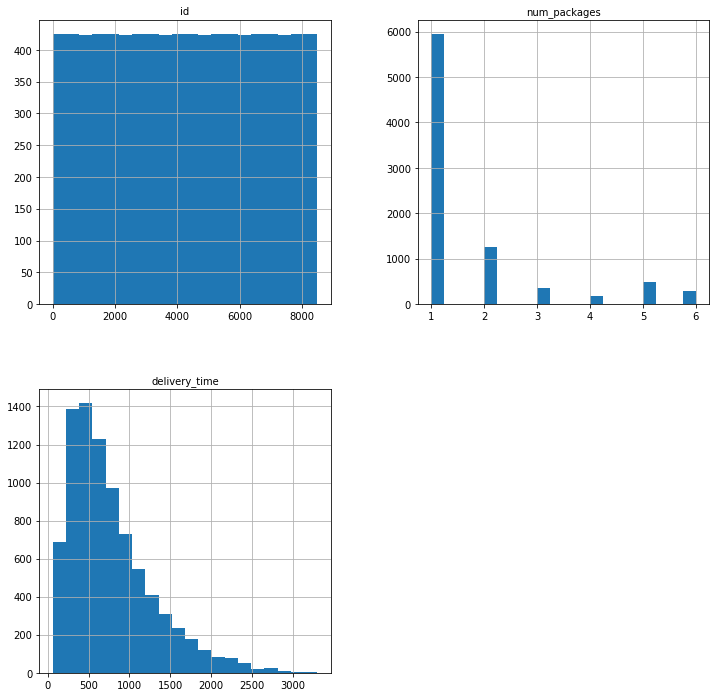

In [24]:
%matplotlib inline
import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df1.starting_time, y=df1.delivery_time, title='delivery trhought he years ')  

## Target variable visualisation 

8494
0
count    8494.000000
mean      769.416765
std       513.649159
min        60.000000
25%       388.000000
50%       641.500000
75%      1018.000000
max      3300.000000
Name: delivery_time, dtype: float64


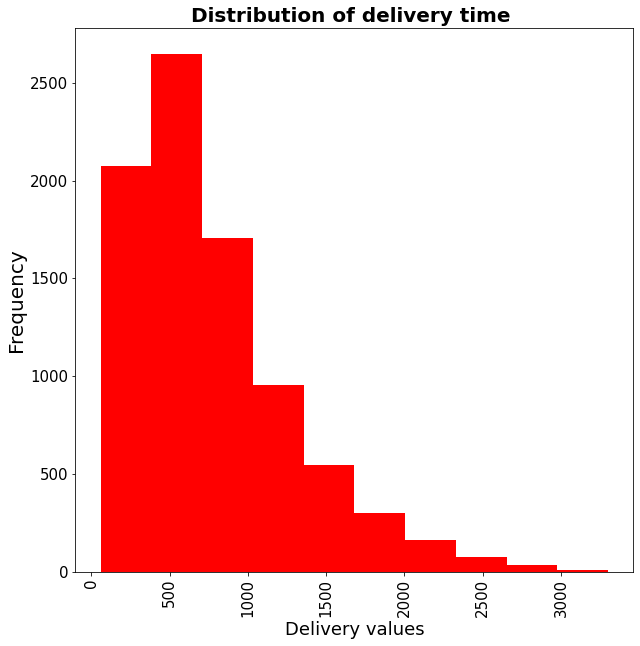

skeweness test 
1.2896448774064306


In [25]:
from matplotlib import pyplot 
#size of rba
print(len(df1['delivery_time']))
#number of nulls
print(df1['delivery_time'].isnull().sum())
#other stat
print(df1['delivery_time'].describe())



deliveryhist = df1['delivery_time'].hist( figsize = (10, 10),
                                   grid = False,facecolor='r',range=(min(df1['delivery_time']), max(df1['delivery_time'])))
#set x axis legend to the median of the bin

plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
deliveryhist.set_xlabel('Delivery values',fontsize=18)
deliveryhist.set_ylabel(('Frequency') ,fontsize=20)
deliveryhist.set_title('Distribution of delivery time ',fontsize=20,weight='bold')
plt.show()

print("skeweness test ")
data = pd.to_numeric(df['delivery_time'], downcast='integer')
print(scipy.stats.skew(data))


<div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Feature engineering  </div> 

## Create the variable starting_time_U  in unix timestamp format for the starting time

In [26]:
import datetime
df1['starting_time']  = df1['starting_time'].astype('datetime64[ns]')
df1['starting_time_U'] = (df1['starting_time'].apply(lambda x: x.toordinal()) - datetime.date(1970, 1, 1).toordinal()) * 24*60*60


In [27]:
df1['starting_time_U']

0       1460592000
1       1464566400
2       1456963200
3       1462147200
4       1456876800
           ...    
8489    1462147200
8490    1465084800
8491    1457568000
8492    1462147200
8493    1463011200
Name: starting_time_U, Length: 8494, dtype: int64

In [28]:
df_t['starting_time']  = df_t['starting_time'].astype('datetime64[ns]')
df_t['starting_time_U'] = (df_t['starting_time'].apply(lambda x: x.toordinal()) - datetime.date(1970, 1, 1).toordinal()) * 24*60*60


## Creating the variable day of delivery 

In [29]:
df1['starting_time_day'] = df1['starting_time'].dt.dayofweek
print(df1['starting_time_day'].head())

0    3
1    0
2    3
3    0
4    2
Name: starting_time_day, dtype: int64


In [30]:
df_t['starting_time_day'] = df_t['starting_time'].dt.dayofweek

## Import metadata categories

In [31]:
## Import weather data - drop duplicates 
weather = pd.read_csv("train_weather.csv")
weather.drop_duplicates(subset='id').reset_index(drop=True)
df1 = df1.merge(weather, on='id', how='left' )

In [32]:
weathert = pd.read_csv("test_weather.csv")
weathert.drop_duplicates(subset='id').reset_index(drop=True)
df_t = df_t.merge(weathert, on='id', how='left' )

In [33]:
weather

,id,wea_conditions,wea_temp,wea_dptemp,wea_humidity,wea_windspeed,wea_winddir,wea_visibility,wea_pressure,wea_precipitation,wea_fog,wea_rain,wea_snow
0,7322,Mostly_Cloudy,22.8,11.7,49.0,7.4,0,16.1,29.9,NaN,No,No,No
1,5677,Clear,12.8,-2.8,34.0,0.0,0,16.1,29.9,NaN,No,No,No
2,5269,Clear,16.7,-6.7,20.0,5.6,0,16.1,30.3,NaN,No,No,No
3,7334,Overcast,9.4,7.2,86.0,13.0,70,16.1,29.8,0.8,No,No,No
4,3356,Light_Rain,11.7,10.6,93.0,5.6,0,4.0,29.9,1.8,No,Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,4403,Haze,11.7,8.9,83.0,NaN,0,9.7,29.7,0.3,No,No,No
8490,1073,Clear,10.0,2.8,61.0,25.9,60,16.1,30.1,NaN,No,No,No
8491,2026,Clear,-6.1,-11.1,68.0,7.4,0,16.1,29.9,NaN,No,No,No
8492,7646,Overcast,11.7,-3.9,34.0,16.7,300,16.1,29.8,NaN,No,No,No


In [34]:
# Import geographical data - drop duplicates 
geo = pd.read_csv("train_geo.csv")
geo = geo.drop_duplicates(subset='id').reset_index(drop=True)
df1 = df1.merge(geo, on='id', how='left' )

In [35]:
geot = pd.read_csv("test_geo.csv")
geot = geot.drop_duplicates(subset='id').reset_index(drop=True)
df_t = df_t.merge(geot, on='id', how='left' )

In [36]:
geot

,id,town,start_Longitude,start_Latitude,end_Longitude,end_Latitude,state
0,15549,Hawkins,-73.988533,40.718079,-73.981163,40.714291,UNK
1,14193,Hawkins,-73.994492,40.746063,-74.000748,40.728912,UNK
2,11721,Hawkins,-73.983192,40.734978,-73.983742,40.721352,UNK
3,14956,Hawkins,-73.983215,40.756275,-73.973015,40.780201,UNK
4,13184,Hawkins,-73.959343,40.777290,-73.966911,40.761131,UNK
...,...,...,...,...,...,...,...
8491,14633,Hawkins,-73.977310,40.789562,-73.951462,40.790752,UNK
8492,14473,Hawkins,-74.003838,40.744358,-73.995674,40.745018,UNK
8493,8810,Hawkins,-74.002754,40.714245,-74.000114,40.717838,UNK
8494,11572,Hawkins,-73.969330,40.763802,-73.958298,40.775570,UNK


In [37]:
#check for unique IDs
df1.iloc[:,0].nunique()

8494

In [38]:
df1.iloc[:,20:24] = df1.iloc[:,20:24].apply(pd.to_numeric)

In [39]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


df1['distance'] =  haversine(df1.loc[:, 'start_Latitude'], df1.loc[:, 'start_Longitude'], df1.loc[:, 'end_Latitude'], df1.loc[:, 'end_Longitude'])

In [40]:

df_t['distance'] =  haversine(df_t.loc[:, 'start_Latitude'], df_t.loc[:, 'start_Longitude'], df_t.loc[:, 'end_Latitude'], df_t.loc[:, 'end_Longitude'])

In [41]:
df1.head()

,id,starting_time,model_van,num_packages,delivery_time,starting_time_U,starting_time_day,wea_conditions,wea_temp,wea_dptemp,wea_humidity,wea_windspeed,wea_winddir,wea_visibility,wea_pressure,wea_precipitation,wea_fog,wea_rain,wea_snow,town,start_Longitude,start_Latitude,end_Longitude,end_Latitude,distance
0,1,2016-04-14 20:53:00,model_A,3,448,1460592000,3,Clear,8.9,0.0,54.0,16.7,170,16.1,30.4,NaN,No,No,No,Hawkins,-73.950912,40.825974,-73.944740,40.814163,1.412222
1,2,2016-05-30 23:12:00,model_B,1,784,1464566400,0,Partly_Cloudy,22.8,18.9,79.0,9.3,0,16.1,30.0,NaN,No,No,No,Hawkins,-73.985680,40.760487,-73.942482,40.786232,4.628968
2,3,2016-03-03 11:54:00,model_B,1,844,1456963200,3,Clear,0.0,-15.6,31.0,9.3,250,16.1,30.2,NaN,No,No,No,Hawkins,-73.985420,40.758389,-74.007294,40.726639,3.982410
3,4,2016-05-02 12:34:00,model_A,1,2076,1462147200,0,Overcast,0.6,-1.7,85.0,13.0,300,4.0,30.1,NaN,No,No,No,Hawkins,-73.870964,40.773792,-73.989090,40.746052,10.416333
4,5,2016-03-02 15:53:00,model_A,1,1289,1456876800,2,Rain,13.9,12.2,89.0,11.1,170,1.6,30.0,5.1,No,Y,No,Hawkins,-73.979012,40.745266,-73.979240,40.772480,3.026126


In [42]:
df_t.head()

,id,starting_time,model_van,num_packages,delivery_time,starting_time_U,starting_time_day,wea_conditions,wea_temp,wea_dptemp,wea_humidity,wea_windspeed,wea_winddir,wea_visibility,wea_pressure,wea_precipitation,wea_fog,wea_rain,wea_snow,town,start_Longitude,start_Latitude,end_Longitude,end_Latitude,state,distance
0,8495,2016-01-20 12:53:00,model_A,1,769,1453248000,2,Clear,2.2,-8.9,44.0,NaN,0,16.1,30.1,NaN,No,No,No,Hawkins,-73.982864,40.761646,-73.987694,40.752186,UNK,1.127862
1,8496,2016-01-29 13:56:00,model_B,1,769,1454025600,4,Overcast,4.4,-4.4,53.0,16.7,300,16.1,29.5,NaN,No,No,No,Hawkins,-74.010368,40.718838,-73.997566,40.732826,UNK,1.892948
2,8497,2016-02-17 22:55:00,model_A,1,769,1455667200,2,Clear,1.7,-4.4,64.0,13.0,290,16.1,30.2,NaN,No,No,No,Hawkins,-73.972809,40.759476,-73.955620,40.776424,UNK,2.376385
3,8498,2016-01-17 01:53:00,model_A,1,769,1452988800,6,Overcast,5.0,-2.2,60.0,13.0,300,16.1,29.8,NaN,No,No,No,Hawkins,-73.981178,40.763210,-73.944641,40.725609,UNK,5.191912
4,8499,2016-05-28 10:55:00,model_B,1,769,1464393600,5,Clear,28.3,17.8,53.0,9.3,0,11.3,30.1,NaN,No,No,No,Hawkins,-73.967590,40.762863,-73.977432,40.745369,UNK,2.114548


In [43]:
len(df1)

8494

 <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Preprocessing </div> 

## Missing values

In [44]:
# Percentage of missing values identifyied with "null"
print(100*df1.isnull().sum()/df1.isnull().count())

id                    0.000000
starting_time         0.000000
model_van             0.000000
num_packages          0.000000
delivery_time         0.000000
starting_time_U       0.000000
starting_time_day     0.000000
wea_conditions        0.000000
wea_temp              0.023546
wea_dptemp            0.023546
wea_humidity          0.023546
wea_windspeed         7.734872
wea_winddir           0.000000
wea_visibility        2.696021
wea_pressure          2.660702
wea_precipitation    84.918766
wea_fog               0.000000
wea_rain              0.000000
wea_snow              0.000000
town                  0.000000
start_Longitude       0.000000
start_Latitude        0.000000
end_Longitude         0.000000
end_Latitude          0.000000
distance              0.000000
dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap on delivery times')

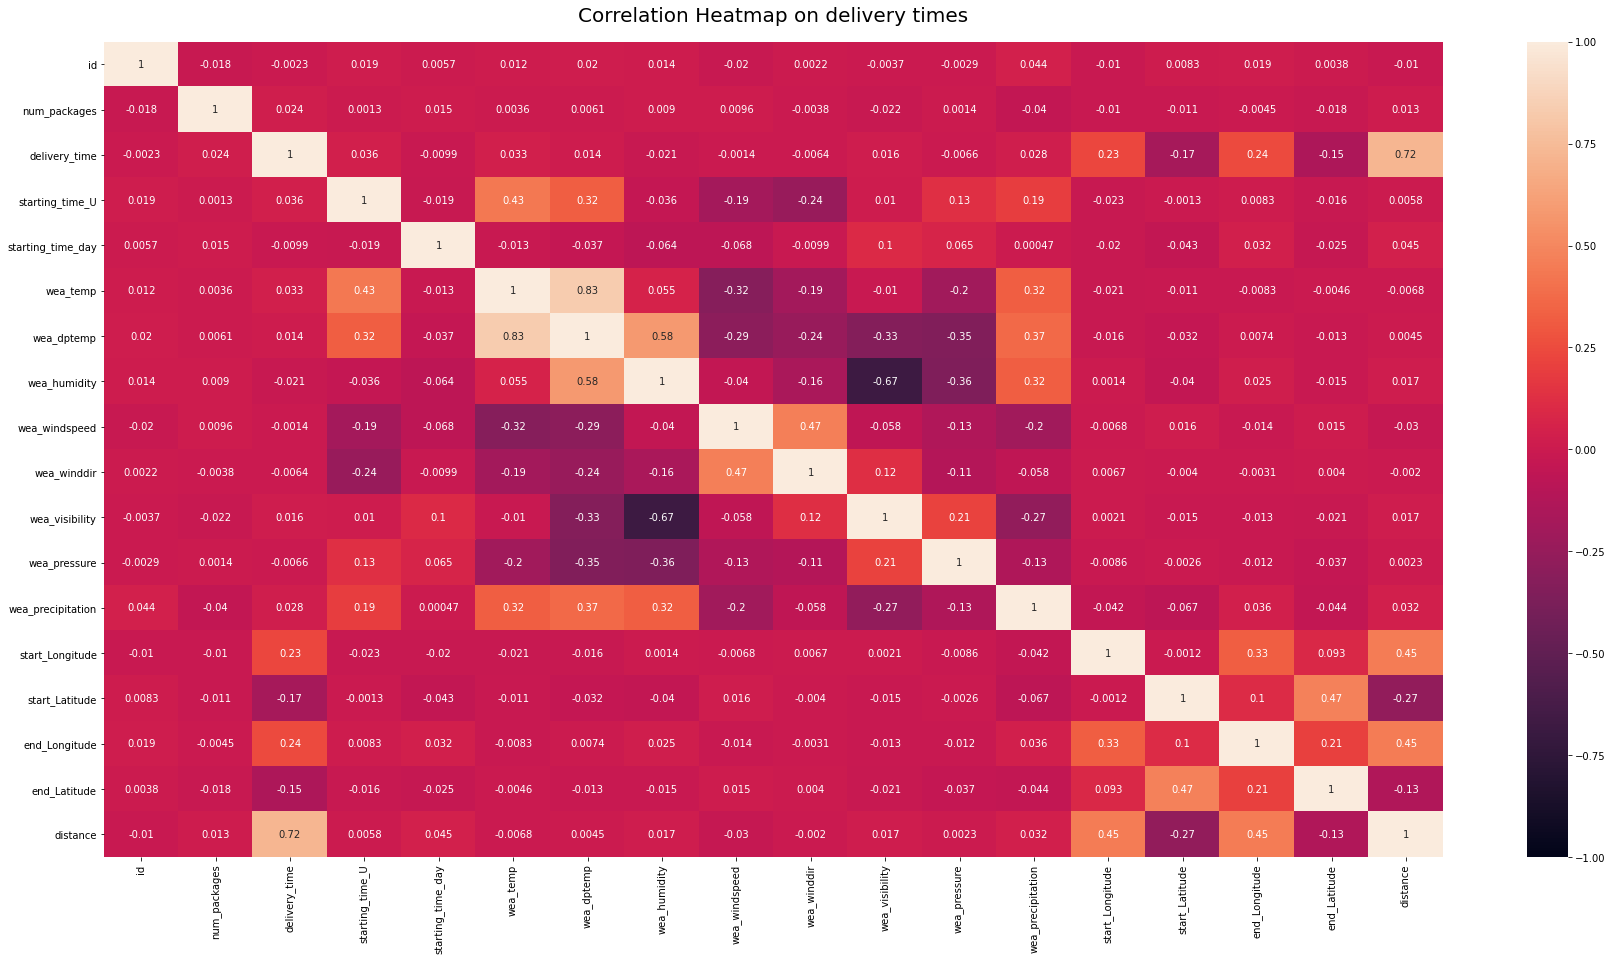

In [45]:
#correzlation_2
plt.figure(figsize=(30,15))
heatmap=sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap on delivery times', fontdict={'fontsize':20},pad=20)

In [46]:
#Other metrics for null values: interrogation mark 
for name in df1.columns:
    li = []
    for el in df1[name].astype(str):
        li.append(len(re.findall("\?.*",el)))
    print(name)
    print(100 * sum(li) / len(df1[name]))

id
0.0
starting_time
0.0
model_van
0.0
num_packages
0.0
delivery_time
0.0
starting_time_U
0.0
starting_time_day
0.0
wea_conditions
0.0
wea_temp
0.0
wea_dptemp
0.0
wea_humidity
0.0
wea_windspeed
0.0
wea_winddir
0.0
wea_visibility
0.0
wea_pressure
0.0
wea_precipitation
0.0
wea_fog
0.0
wea_rain
0.0
wea_snow
0.0
town
0.0
start_Longitude
0.0
start_Latitude
0.0
end_Longitude
0.0
end_Latitude
0.0
distance
0.0


In [47]:
#check for string na
    #assign null if n/a as string 
def inter(df):
    summed = []
    for col in df.columns:
        indiv = []
        for el in df[col].astype(str):
            if el == 'nan' or el == 'NaN' or el == ' ':
                indiv.append(el)
        summed.append(col)
        summed.append(100 * len(indiv) / len(df[col]))
        df[col].loc[el] = None
    return [summed,df]

result = inter(df1)
print(result[0])
df1 = result[1]

['id', 0.0, 'starting_time', 0.0, 'model_van', 0.0, 'num_packages', 0.0, 'delivery_time', 0.0, 'starting_time_U', 0.0, 'starting_time_day', 0.0, 'wea_conditions', 0.0, 'wea_temp', 0.02354603249352484, 'wea_dptemp', 0.02354603249352484, 'wea_humidity', 0.02354603249352484, 'wea_windspeed', 7.73487167412291, 'wea_winddir', 0.0, 'wea_visibility', 2.6960207205085944, 'wea_pressure', 2.660701671768307, 'wea_precipitation', 84.91876618789733, 'wea_fog', 0.0, 'wea_rain', 0.0, 'wea_snow', 0.0, 'town', 0.0, 'start_Longitude', 0.0, 'start_Latitude', 0.0, 'end_Longitude', 0.0, 'end_Latitude', 0.0, 'distance', 0.0]


# Missing values
1. Drop the 98% and above missing values column 
2. Drop duplicate column
2. Inspect the column with a single value 
3. Impute or/and drop remaining missing values 

**Drop the 85% and above missing values column** <br>
**Drop duplicate collumns** 

In [48]:
#Dropping 100% missing value column 
df1 = df1.drop(["wea_precipitation","wea_dptemp"], axis = 1)
df_t = df_t.drop(["wea_precipitation","wea_dptemp"], axis = 1)

In [49]:
df1

,id,starting_time,model_van,num_packages,delivery_time,starting_time_U,starting_time_day,wea_conditions,wea_temp,wea_humidity,wea_windspeed,wea_winddir,wea_visibility,wea_pressure,wea_fog,wea_rain,wea_snow,town,start_Longitude,start_Latitude,end_Longitude,end_Latitude,distance
0,1,2016-04-14 20:53:00,model_A,3,448,1460592000,3,Clear,8.9,54.0,16.7,170,16.1,30.4,No,No,No,Hawkins,-73.950912,40.825974,-73.944740,40.814163,1.412222
1,2,2016-05-30 23:12:00,model_B,1,784,1464566400,0,Partly_Cloudy,22.8,79.0,9.3,0,16.1,30.0,No,No,No,Hawkins,-73.985680,40.760487,-73.942482,40.786232,4.628968
2,3,2016-03-03 11:54:00,model_B,1,844,1456963200,3,Clear,0.0,31.0,9.3,250,16.1,30.2,No,No,No,Hawkins,-73.985420,40.758389,-74.007294,40.726639,3.982410
3,4,2016-05-02 12:34:00,model_A,1,2076,1462147200,0,Overcast,0.6,85.0,13.0,300,4.0,30.1,No,No,No,Hawkins,-73.870964,40.773792,-73.989090,40.746052,10.416333
4,5,2016-03-02 15:53:00,model_A,1,1289,1456876800,2,Rain,13.9,89.0,11.1,170,1.6,30.0,No,Y,No,Hawkins,-73.979012,40.745266,-73.979240,40.772480,3.026126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,8490,2016-05-02 08:27:00,model_A,6,689,1462147200,0,Snow,-0.6,92.0,16.7,20,0.4,30.1,Y,No,Y,Hawkins,-73.992950,40.730621,-73.980537,40.751068,2.502563
8490,8491,2016-06-05 07:56:00,model_B,3,538,1465084800,6,Overcast,8.9,89.0,22.2,60,14.5,29.7,No,No,No,Hawkins,-74.008171,40.738667,-73.994019,40.767262,3.395748
8491,8492,2016-03-10 12:49:00,model_B,1,3093,1457568000,3,Mostly_Cloudy,20.6,63.0,7.4,50,14.5,30.1,No,No,No,Hawkins,-73.970123,40.765587,-73.789490,40.644848,20.299921
8492,8493,2016-05-02 20:52:00,model_B,1,289,1462147200,0,Clear,1.1,42.0,18.5,310,16.1,30.3,No,No,No,Hawkins,-73.978973,40.762123,-73.979095,40.772747,1.181372


**Replace missing values** <br>
- With 0 for wind speed, temperature and humidity 
- With collumn maximum for visibility and pressure 

In [50]:
df1.loc[:,'wea_windspeed'].fillna('0',inplace=True)
df1.loc[:,'wea_humidity'].fillna('0',inplace=True)
df1['wea_visibility'].fillna(df1.wea_visibility.max(),inplace=True) 
df1['wea_pressure'].fillna(df1.wea_pressure.max(),inplace=True) 
df1['wea_temp'].fillna('0',inplace=True)

In [51]:
df_t.loc[:,'wea_windspeed'].fillna('0',inplace=True)
df_t.loc[:,'wea_humidity'].fillna('0',inplace=True)
df_t['wea_visibility'].fillna(df_t.wea_visibility.min(),inplace=True) 
df_t['wea_pressure'].fillna(df_t.wea_pressure.min(),inplace=True) 
df_t['wea_temp'].fillna('0',inplace=True)

**Inspect the column with a single value**

In [52]:
#check for other column with a single value 
print({col: df1[col].nunique() for col in df1.columns})
print("")
#Org_code, status,isBlackListed,date_of_assessment have only 1 values; flag variable ??
print({col: pd.Series(df1[col]).drop_duplicates().tolist() for col in df1.columns if df1[col].nunique() == 1})
#see below the unique value text to check for a flag or not: if it has null values it could be that the user input a 
#value for a scenario such as blacklisted or let as null if not 
{col: pd.Series(df1[col]).isna().sum() for col in df1.columns if df1[col].nunique() == 1}
#no missing values for the selected collumn, the above theory does not apply to any of the collumn, they are to be dropped

df1 = df1.drop(["town"], axis = 1)

{'id': 8494, 'starting_time': 6828, 'model_van': 2, 'num_packages': 6, 'delivery_time': 1945, 'starting_time_U': 153, 'starting_time_day': 7, 'wea_conditions': 13, 'wea_temp': 126, 'wea_humidity': 89, 'wea_windspeed': 21, 'wea_winddir': 37, 'wea_visibility': 17, 'wea_pressure': 15, 'wea_fog': 2, 'wea_rain': 2, 'wea_snow': 2, 'town': 1, 'start_Longitude': 5368, 'start_Latitude': 6812, 'end_Longitude': 5547, 'end_Latitude': 7013, 'distance': 8494}

{'town': ['Hawkins']}


In [53]:
df_t = df_t.drop(["town"], axis = 1)

**Impute or/and drop remaining missing values**

In [54]:
#Confirm absence of null values
print(100*df1.isnull().sum()/df1.isnull().count())

id                   0.0
starting_time        0.0
model_van            0.0
num_packages         0.0
delivery_time        0.0
starting_time_U      0.0
starting_time_day    0.0
wea_conditions       0.0
wea_temp             0.0
wea_humidity         0.0
wea_windspeed        0.0
wea_winddir          0.0
wea_visibility       0.0
wea_pressure         0.0
wea_fog              0.0
wea_rain             0.0
wea_snow             0.0
start_Longitude      0.0
start_Latitude       0.0
end_Longitude        0.0
end_Latitude         0.0
distance             0.0
dtype: float64


In [55]:
#Remaining collumn rows 
print(len(df1))
len(df_t)

8494


8496

# Cleaning data types

**Getting rid of the letters with numeric collumns**

In [56]:
#CREATING A FUNCTION TO TRANSFORM TEXT (example 3.17B) INTO NUMBER (REAL NUMBERS, example 3,170,000,000).
def clear_backslash(text):
    ''' Function to clear backslash as they cause all sort of troubles '''
    result = text
    if "\\" in text:
        result = '0'
    return (result)

In [57]:
#CREATING A FUNCTION TO TRANSFORM TEXT (example 3.17B) INTO NUMBER (REAL NUMBERS, example 3,170,000,000).
def text_to_num(text):
    ''' DOC STRING: Function to transform numbers with letter into pure numbers, example: 3.17B into 3,170,000,000 '''
    if type(text) != str:
        return(text)
    result = 0.0  
    text = text.replace(",", "")  
    try:
            if text[-1] in d:
                num, magnitude = text[:-1], text[-1]
                result = float(num) * (10 ** d[magnitude])  #this case is when "text" has T, B, M, k or %
            else:
                result = float(text) #this case is when "text" is string but look like a numeric
    except:
        try:
            result = 1.0*text #this is when "text" is already numeric
        except:
            result = text #it will reach this case when it is impossible to transform into numeric
    return(result)

In [58]:
for fieldname in df1.columns:
    try:
        print(fieldname)
        array_tmp = np.vectorize(clear_backslash)(df1[fieldname].astype(str))
        df1[fieldname] = np.vectorize(text_to_num)(array_tmp)
    except: #It is a date
        print("ERROR:",fieldname, "is a date type!")

id
starting_time
model_van
num_packages
delivery_time
starting_time_U
starting_time_day
wea_conditions
wea_temp
wea_humidity
wea_windspeed
wea_winddir
wea_visibility
wea_pressure
wea_fog
wea_rain
wea_snow
start_Longitude
start_Latitude
end_Longitude
end_Latitude
distance


In [59]:
for fieldname in df_t.columns:
    try:
        array_tmp = np.vectorize(clear_backslash)(df_t[fieldname].astype(str))
        df_t[fieldname] = np.vectorize(text_to_num)(array_tmp)
    except: #It is a date
        print("ERROR:",fieldname, "is a date type!")

for fieldname in df1.columns:
    try:
        print(fieldname)
        array_tmp = np.vectorize(clear_backslash)(df1[fieldname].astype(str))
        df1[fieldname] = np.vectorize(nominus)(array_tmp)
    except: #It is a date
        print("ERROR:",fieldname, "is a date type!")

In [60]:
#set dummy values for wind direction : south, north, east, west
def categorize(text):
    text = int(text)
    if text == 0:
        text = 0
    elif text < 90:
        text = 1
    elif text < 180:
        text = 2
    elif text < 270:
        text = 3
    elif text < 360:
        text = 4
    return text 
df1['wea_winddir'] = np.vectorize(categorize)(df1['wea_winddir'])


In [61]:
df_t['wea_winddir'] = np.vectorize(categorize)(df_t['wea_winddir'])

In [62]:
print(100*df1.isnull().sum()/df1.isnull().count())

id                   0.0
starting_time        0.0
model_van            0.0
num_packages         0.0
delivery_time        0.0
starting_time_U      0.0
starting_time_day    0.0
wea_conditions       0.0
wea_temp             0.0
wea_humidity         0.0
wea_windspeed        0.0
wea_winddir          0.0
wea_visibility       0.0
wea_pressure         0.0
wea_fog              0.0
wea_rain             0.0
wea_snow             0.0
start_Longitude      0.0
start_Latitude       0.0
end_Longitude        0.0
end_Latitude         0.0
distance             0.0
dtype: float64


# Standardization

In [63]:
#Set up a column, 'outbounds' for outliers, as we are searching for fraud we will NOT replace outliers
def distribution(x):

    x.dropna()
    #umbalanced dataset: ets take the average of values that are not 0
    data_1 = np.ma.masked_where(x == 0, x)
    stdev = np.std(data_1)
    meanf = np.average(data_1)
    #replace measure of outlier here 
    H = meanf + 2.5 * stdev
    L = meanf - 2.5 * stdev
    if (L < 0):
        L = 0
    out = [H,L]
    return(out)


#compare with each value to the respective column lower and higher bounds for outliers (bounds defined in distribution fun)
def outliers(x):
    dt = pd.DataFrame(x)
    limit = x.apply(distribution)
    y = pd.DataFrame()
    print(limit)
    #check how many outlier the row pocesses
    try:
        for el in dt.columns:
            newcol = str(el)  + ' outbounds'
            dt[newcol] = 0
            #check if there are less than 2 values (no flag variables)
            if (dt[el].nunique() < 3):
                continue
            #unique to our dataset _ no codes or id or target variable 
            if ((el == 'outbounds')):
                continue
            print(el)
            high = limit[el].iloc[0]
            low = limit[el].iloc[1]
            #imbalanced dataset what quantile to use ?
            Q1 = dt[el].quantile(0.25).copy()
            Q3 = dt[el].quantile(0.75).copy()
            count = 0
            for ele in dt[el]:
                if (ele > high):
                    y = y.append([[el, high,low, ele]])
                    #Impute the 75th perc if an outlier over the Hlimit
                    dt.loc[count,el] = Q1
                    dt.loc[count, newcol] =   1
                    #dt.set_value(count, 'outbounds', 1) 
                elif (ele < low): 
                    y = y.append([[el, high,low, ele]])
                    #Impute the 25th perc if an outlier below the Llimit
                    dt.loc[count,el] = Q3
                    dt.loc[count, newcol] =   1
                count += 1
    except:
        print("not fit")
    y.columns =[ 'column', 'Hlimit', 'Llimit' ,'value']
    return([y, dt])

In [64]:
b= outliers(df1.loc[:,['distance','wea_humidity','wea_visibility','wea_windspeed']].apply(pd.to_numeric))
dt_outliers = b[1]
listO = b[0]

    distance  wea_humidity  wea_visibility  wea_windspeed
0  11.243507    109.083857       24.260702      24.710482
1   0.000000      6.292969        3.406781       0.000000
distance
wea_humidity
wea_visibility
wea_windspeed


In [65]:
df1 = pd.concat([df1,dt_outliers['distance outbounds']], axis=1)
df1 = pd.concat([df1,dt_outliers['wea_humidity outbounds']], axis=1)
df1 = pd.concat([df1,dt_outliers['wea_visibility outbounds']], axis=1)
df1 = pd.concat([df1,dt_outliers['wea_windspeed outbounds']], axis=1)

In [66]:
print(df1.head())
listO

  id        starting_time model_van num_packages delivery_time  \
0  1  2016-04-14 20:53:00   model_A            3           448   
1  2  2016-05-30 23:12:00   model_B            1           784   
2  3  2016-03-03 11:54:00   model_B            1           844   
3  4  2016-05-02 12:34:00   model_A            1          2076   
4  5  2016-03-02 15:53:00   model_A            1          1289   

  starting_time_U starting_time_day wea_conditions wea_temp wea_humidity  \
0      1460592000                 3          Clear      8.9         54.0   
1      1464566400                 0  Partly_Cloudy     22.8         79.0   
2      1456963200                 3          Clear      0.0         31.0   
3      1462147200                 0       Overcast      0.6         85.0   
4      1456876800                 2           Rain     13.9         89.0   

  wea_windspeed  wea_winddir wea_visibility wea_pressure wea_fog wea_rain  \
0          16.7            2           16.1         30.4      No     

,column,Hlimit,Llimit,value
0,distance,11.243507,0.0,20.845641
0,distance,11.243507,0.0,22.327077
0,distance,11.243507,0.0,12.182918
0,distance,11.243507,0.0,21.836106
0,distance,11.243507,0.0,20.722275
...,...,...,...,...
0,wea_windspeed,24.710482,0.0,25.900000
0,wea_windspeed,24.710482,0.0,29.600000
0,wea_windspeed,24.710482,0.0,25.900000
0,wea_windspeed,24.710482,0.0,31.500000


In [67]:
bt= outliers(df_t.loc[:,['distance','wea_humidity','wea_visibility','wea_windspeed']].apply(pd.to_numeric))
dt_outlierst = bt[1]
listOt = b[0]

    distance  wea_humidity  wea_visibility  wea_windspeed
0  10.959047    109.255517       25.190052      25.925208
1   0.000000      5.744601        1.592410       0.000000
distance
wea_humidity
wea_visibility
wea_windspeed


In [68]:
df_t = pd.concat([df_t,dt_outlierst['distance outbounds']], axis=1)
df_t = pd.concat([df_t,dt_outlierst['wea_humidity outbounds']], axis=1)
df_t = pd.concat([df_t,dt_outlierst['wea_visibility outbounds']], axis=1)
df_t = pd.concat([df_t,dt_outlierst['wea_windspeed outbounds']], axis=1)

In [69]:
df1.iloc[:,4:5]

,delivery_time
0,448
1,784
2,844
3,2076
4,1289
...,...
8489,689
8490,538
8491,3093
8492,289


#Standardizing the target variable, rbavalue
dt2 = df1.iloc[:,4:5]
scaler = StandardScaler()
scaler.fit(dt2)
print(scaler.mean_)
df_scaling1 = scaler.transform(dt2)
df1.iloc[:,4:5]  = df_scaling1

**Independent variables**

# Encoding features 

In [70]:
# pandas get dummies 
print(df1.model_van.unique())
df1 = pd.concat([df1, pd.get_dummies(df1['model_van'])], axis=1); 

['model_A' 'model_B']


In [71]:
# pandas get dummies 
print(df_t.model_van.unique())
df_t = pd.concat([df_t, pd.get_dummies(df_t['model_van'])], axis=1);

['model_A' 'model_B']


In [72]:
df1.loc[:,'wea_rain'] = df1.loc[:,'wea_rain'].astype('str')
le = LabelEncoder()
le.fit(df1.loc[:,'wea_rain'])
list(le.classes_)
encodedrisk = le.transform(df1.loc[:,'wea_rain'])
encodeddf = pd.DataFrame({'rain':encodedrisk})
df1.loc[:,'wea_rain'] = encodeddf.loc[:,'rain']

In [73]:
df_t.loc[:,'wea_rain'] = df_t.loc[:,'wea_rain'].astype('str')
le = LabelEncoder()
le.fit(df_t.loc[:,'wea_rain'])
list(le.classes_)
encodedrisk = le.transform(df_t.loc[:,'wea_rain'])
encodeddf = pd.DataFrame({'rain':encodedrisk})
df_t.loc[:,'wea_rain'] = encodeddf.loc[:,'rain']

In [74]:
df1.loc[:,'wea_snow'] = df1.loc[:,'wea_snow'].astype('str')
le = LabelEncoder()
le.fit(df1.loc[:,'wea_snow'])
list(le.classes_)
encodedrisk = le.transform(df1.loc[:,'wea_snow'])
encodeddf = pd.DataFrame({'snow':encodedrisk})
df1.loc[:,'wea_snow'] = encodeddf.loc[:,'snow']

In [75]:
df_t.loc[:,'wea_snow'] = df_t.loc[:,'wea_snow'].astype('str')
le = LabelEncoder()
le.fit(df_t.loc[:,'wea_snow'])
list(le.classes_)
encodedrisk = le.transform(df_t.loc[:,'wea_snow'])
encodeddf = pd.DataFrame({'snow':encodedrisk})
df_t.loc[:,'wea_snow'] = encodeddf.loc[:,'snow']

In [76]:
df1.loc[:,'wea_fog'] = df1.loc[:,'wea_fog'].astype('str')
le = LabelEncoder()
le.fit(df1.loc[:,'wea_fog'])
list(le.classes_)
encodedrisk = le.transform(df1.loc[:,'wea_fog'])
encodeddf = pd.DataFrame({'fog':encodedrisk})
df1.loc[:,'wea_fog'] = encodeddf.loc[:,'fog']

In [77]:
df_t.loc[:,'wea_fog'] = df_t.loc[:,'wea_fog'].astype('str')
le = LabelEncoder()
le.fit(df_t.loc[:,'wea_fog'])
list(le.classes_)
encodedrisk = le.transform(df_t.loc[:,'wea_fog'])
encodeddf = pd.DataFrame({'fog':encodedrisk})
df_t.loc[:,'wea_fog'] = encodeddf.loc[:,'fog']

In [78]:
df1.loc[:,'wea_conditions'] = df1.loc[:,'wea_conditions'].astype('str')

In [79]:
df_t.loc[:,'wea_conditions'] = df_t.loc[:,'wea_conditions'].astype('str')

In [80]:
le = LabelEncoder()
le.fit(df1.loc[:,'wea_conditions'])
list(le.classes_)
encodedrisk = le.transform(df1.loc[:,'wea_conditions'])
encodeddf = pd.DataFrame({'weather_encoded':encodedrisk})
df1.loc[:,'wea_conditions'] = encodeddf.loc[:,'weather_encoded']

In [81]:
le = LabelEncoder()
le.fit(df_t.loc[:,'wea_conditions'])
list(le.classes_)
encodedrisk = le.transform(df_t.loc[:,'wea_conditions'])
encodeddf = pd.DataFrame({'weather_encoded':encodedrisk})
df_t.loc[:,'wea_conditions'] = encodeddf.loc[:,'weather_encoded']

In [82]:
# dropping the dummified collumns 
df1 = df1.drop(['wea_conditions','model_van'], axis = 1)

In [83]:
df_t = df_t.drop(['wea_conditions','model_van'], axis = 1)

In [84]:
df1.head(10)

,id,starting_time,num_packages,delivery_time,starting_time_U,starting_time_day,wea_temp,wea_humidity,wea_windspeed,wea_winddir,wea_visibility,wea_pressure,wea_fog,wea_rain,wea_snow,start_Longitude,start_Latitude,end_Longitude,end_Latitude,distance,distance outbounds,wea_humidity outbounds,wea_visibility outbounds,wea_windspeed outbounds,model_A,model_B
0,1,2016-04-14 20:53:00,3,448,1460592000,3,8.9,54.0,16.7,2,16.1,30.4,0,0,0,-73.9509124755859,40.8259735107422,-73.9447402954102,40.8141632080078,1.412221661244668,0,0,0,0,1,0
1,2,2016-05-30 23:12:00,1,784,1464566400,0,22.8,79.0,9.3,0,16.1,30.0,0,0,0,-73.9856796264649,40.7604866027832,-73.9424819946289,40.7862319946289,4.628967670185963,0,0,0,0,0,1
2,3,2016-03-03 11:54:00,1,844,1456963200,3,0.0,31.0,9.3,3,16.1,30.2,0,0,0,-73.9854202270508,40.7583885192871,-74.0072937011719,40.7266387939453,3.982410120086939,0,0,0,0,0,1
3,4,2016-05-02 12:34:00,1,2076,1462147200,0,0.6,85.0,13.0,4,4.0,30.1,0,0,0,-73.870964050293,40.7737922668457,-73.9890899658203,40.7460517883301,10.416332716710325,0,0,0,0,1,0
4,5,2016-03-02 15:53:00,1,1289,1456876800,2,13.9,89.0,11.1,2,1.6,30.0,0,1,0,-73.9790115356445,40.7452659606934,-73.9792404174805,40.7724800109863,3.0261257310413945,0,0,1,0,1,0
5,6,2016-05-10 18:52:00,1,902,1462838400,1,16.1,56.0,0.0,0,16.1,30.3,0,0,0,-73.9915161132813,40.7544441223145,-73.9919509887695,40.733211517334,2.36124218713082,0,0,0,0,0,1
6,7,2016-04-15 14:54:00,2,803,1460678400,4,16.7,21.0,7.4,0,16.1,30.4,0,0,0,-73.971809387207,40.7944488525391,-73.9872665405274,40.7702369689941,2.990298635746728,0,0,0,0,0,1
7,8,2016-05-05 21:19:00,1,491,1462406400,3,12.2,66.0,16.7,1,16.1,29.7,0,0,0,-74.0066146850586,40.7285995483398,-74.0046691894531,40.7431221008301,1.6231323326784177,0,0,0,0,0,1
8,9,2016-06-11 10:56:00,1,681,1465603200,5,13.3,44.0,0,0,16.1,30.2,0,0,0,-73.9551773071289,40.7801818847656,-73.9810562133789,40.7742385864258,2.277087484889606,0,0,0,0,1,0
9,10,2016-02-10 23:51:00,5,974,1455062400,2,17.2,84.0,0.0,0,11.3,30.0,0,0,0,-74.0020751953125,40.7428016662598,-73.9508743286133,40.7707862854004,5.318023365374618,0,0,0,0,1,0


In [85]:
print(100*df1.isnull().sum()/df1.isnull().count())

id                          0.0
starting_time               0.0
num_packages                0.0
delivery_time               0.0
starting_time_U             0.0
starting_time_day           0.0
wea_temp                    0.0
wea_humidity                0.0
wea_windspeed               0.0
wea_winddir                 0.0
wea_visibility              0.0
wea_pressure                0.0
wea_fog                     0.0
wea_rain                    0.0
wea_snow                    0.0
start_Longitude             0.0
start_Latitude              0.0
end_Longitude               0.0
end_Latitude                0.0
distance                    0.0
distance outbounds          0.0
wea_humidity outbounds      0.0
wea_visibility outbounds    0.0
wea_windspeed outbounds     0.0
model_A                     0.0
model_B                     0.0
dtype: float64


## Grouping features 

In [86]:
len(df1)

8494

## Check for correlation for all variables 

Text(0.5, 1.0, 'Correlation Heatmap on delivery time')

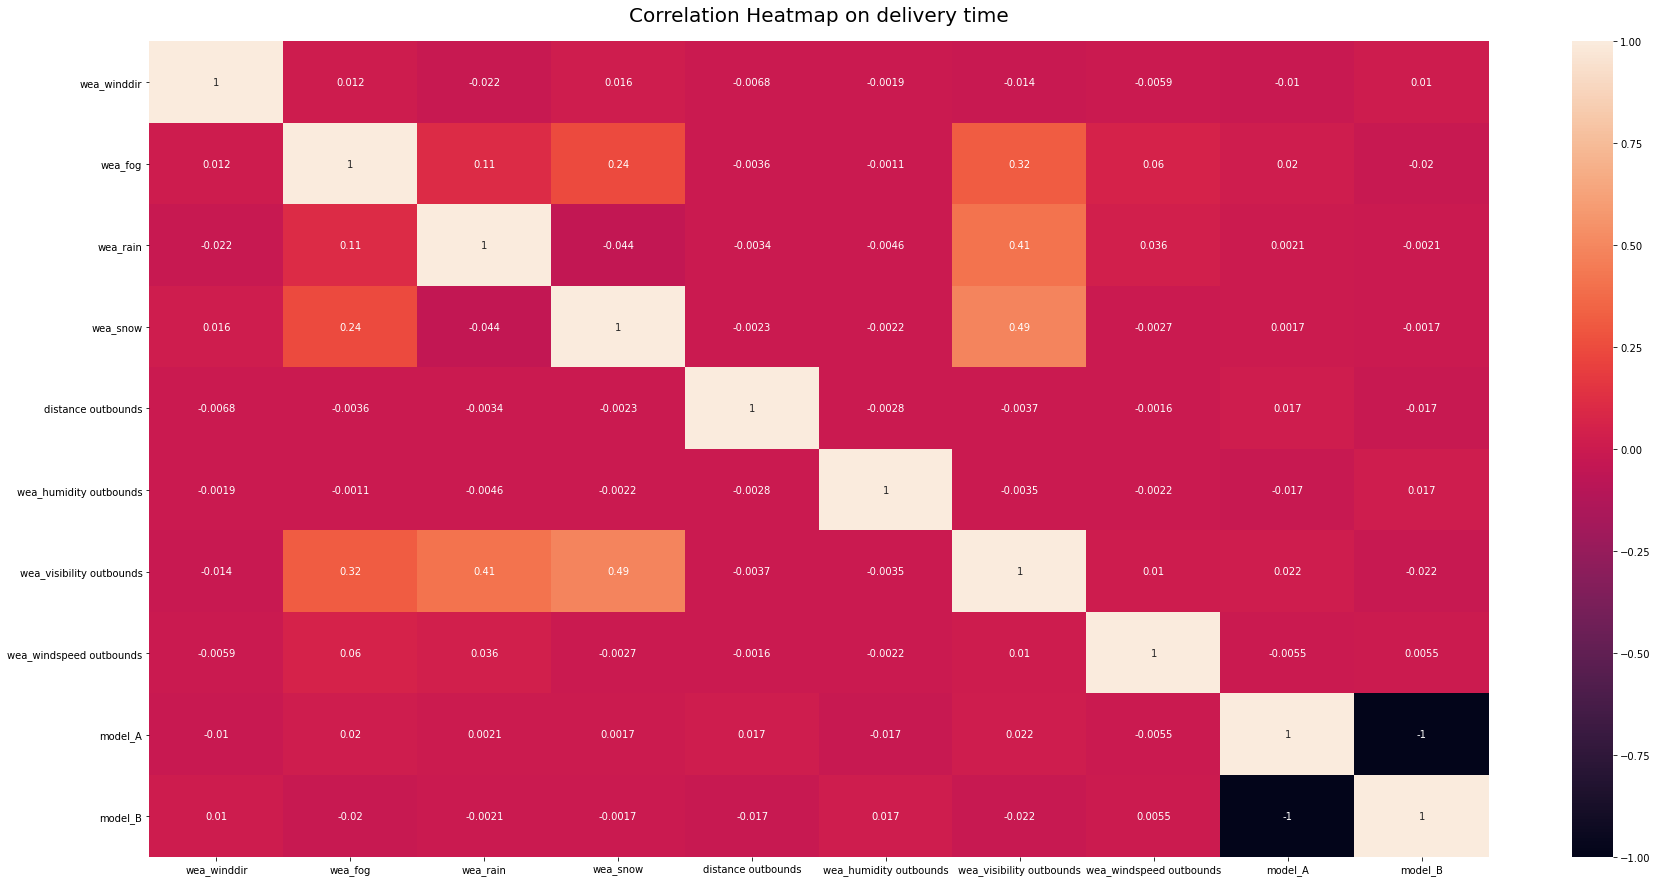

In [87]:
plt.figure(figsize=(30,15))
heatmap=sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap on delivery time', fontdict={'fontsize':20},pad=20)

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Regression</div> 

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Ridge </div> 

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Feature selection </div> 

In [88]:
from sklearn.model_selection import train_test_split
#only numerical collumns ! integer or the value is too big; no n/a
df1_regr = pd.DataFrame()
for col in df1.columns:
    try:
        df1_regr[col] = pd.to_numeric(df1[col], downcast="float")
    except:
        print(col)
        continue
   

df1_regrt = pd.DataFrame()
for col in df_t.columns:
    try:
        df1_regrt[col] = pd.to_numeric(df_t[col], downcast="float")
    except:
        print(col)
        continue
        
X = df1_regr.loc[:, (df1_regr.columns != 'delivery_time')  ]
y = df1_regr.loc[:,'delivery_time']
Xt = df1_regrt.loc[:, (df1_regrt.columns != 'delivery_time')  ]
yt = df1_regrt.loc[:,'delivery_time']
#X_train = X
#X_test = Xt
#Y_train = y
#Y_test = yt
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)
df1_regr.head()
y

starting_time
starting_time
state


0        448.0
1        784.0
2        844.0
3       2076.0
4       1289.0
         ...  
8489     689.0
8490     538.0
8491    3093.0
8492     289.0
8493     718.0
Name: delivery_time, Length: 8494, dtype: float32

## Feature selection by feature importance 

In [89]:
initial_lm_mod = Ridge(alpha = 1,normalize=False)
initial_lm_mod.fit(X_train,Y_train)
init = initial_lm_mod.score(X_train, Y_train)
print("Initial cleaned dataset score: " + str(init))

Initial cleaned dataset score: 0.5811230248390836


C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29053e-17): result may not be accurate.
  overwrite_a=True).T


In [90]:
def get_feature_importance(clf, feature_names):
    return pd.DataFrame({'variable': feature_names, # Feature names
                         'coefficient': clf.coef_# Feature Coeficients
                    }) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

In [91]:
get_feature_importance(initial_lm_mod, X_train.columns)

,variable,coefficient
14,start_Latitude,699.440002
17,distance,155.369995
19,wea_humidity outbounds,61.509998
20,wea_visibility outbounds,21.030001
10,wea_fog,13.660000
1,num_packages,3.190000
6,wea_windspeed,2.030000
4,wea_temp,1.560000
22,model_A,0.300000
0,id,0.000000


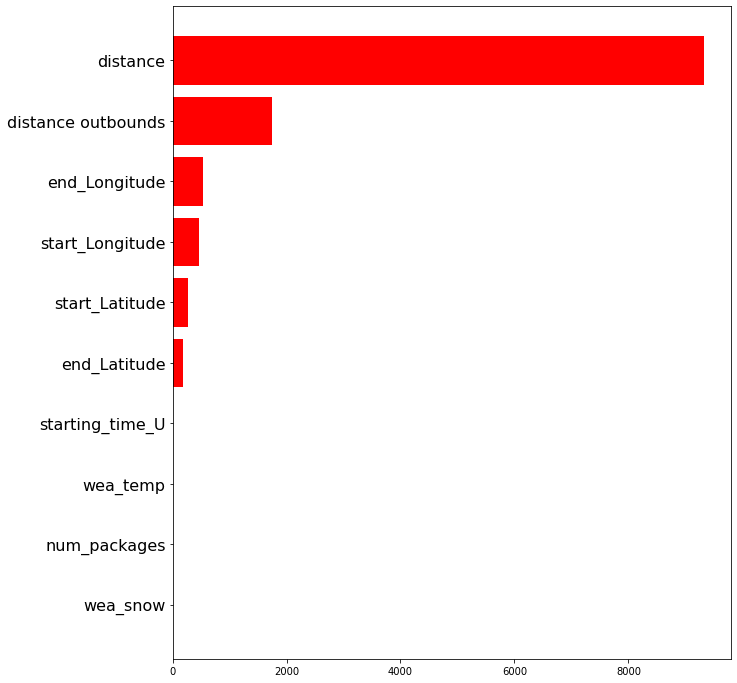

In [92]:
from sklearn import feature_selection
kbest = 10    #= 70% of collumns
ig_selector = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=80).fit(X, y)
# Get the indices sorted by most important to least important
indices = np.argsort(ig_selector.scores_)[::-1]

ig_features = []
for i in range(len(X.columns)):
    ig_features.append(X.columns[indices[i]])


plt.figure(figsize=(10,12))
plt.yticks(rotation='horizontal',fontsize=16)
plt.barh(ig_features[0:kbest], ig_selector.scores_[indices[range(kbest)]], color='r', align='center')
plt.gca().invert_yaxis()
plt.show()

In [93]:
# feature selection function for future use 
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = ig_selector = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=70).fit(X, y)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Model evaluation </div> 

In [94]:
#check other models 
for method in [LinearRegression(),Ridge(),Lasso(),BayesianRidge(),ElasticNet()]:
    model = method
    model.fit(X_train, Y_train)
    model_test_yhat = model.predict(X_test)
    print(model,mean_squared_error(Y_test,model_test_yhat))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 126613.43
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 112664.56
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 114950.734
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 112669.94172871606
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 125987.61


C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29053e-17): result may not be accurate.
  overwrite_a=True).T


In [95]:
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
grid = {
    "alpha": [0.005,0.01,0.05,0.1,0.2,0.5,1],
    "max_iter": [800, 1000, 1200]
}

"Sklearn"
"-----------------------"
grid_search = GridSearchCV(Ridge(), param_grid = grid)
grid_search.fit(X_train_fs, Y_train)
optimal_model = grid_search.best_estimator_
"-----------------------"

print("Fine Tuned Model: {0}".format(optimal_model))

C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.10322e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58929e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.57905e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58009e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (

C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.73135e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.7474e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.62065e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.74134e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (r

Fine Tuned Model: Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=800,
      normalize=False, random_state=None, solver='auto', tol=0.001)


C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.16782e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.19611e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.33297e-17): result may not be accurate.
  overwrite_a=True).T


  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Cross validation </div> 

Predicting rba value

In [96]:
#training the model  witht he best alpha and selected features 
#Ridge regression model
model = Ridge(alpha = optimal_model.alpha,normalize = True)
model.fit(X_train_fs,Y_train)
#Cross validation
scores = cross_val_score(model, X_train_fs, Y_train, cv=5)
print(scores)
interval = str(min(scores)) + str(max(scores)) 

[0.55579312 0.60775762 0.57335867 0.58866152 0.52225977]


In [97]:
#Testing the model 
y_new = model.predict(X_test_fs)
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_new))
print('Root Mean squared error: %.2f'
      % sqrt(mean_absolute_error(Y_test,y_new)))
print('Mean absolute error: %.2f'
      %mean_absolute_error(Y_test,y_new))

Mean squared error: 114642.77
Root Mean squared error: 15.67
Mean absolute error: 245.66


In [98]:
y_new 

array([1259.9453 ,  540.40625,  453.02344, ...,  639.3203 ,  871.4219 ,
        548.3203 ], dtype=float32)

In [99]:
pred = pd.DataFrame(y_new)
pred 

,0
0,1259.945312
1,540.406250
2,453.023438
3,620.898438
4,541.507812
...,...
2799,639.906250
2800,733.679688
2801,639.320312
2802,871.421875


In [100]:
pred["id"] = df_t.loc[:,'id']
pred = pred.rename(columns={"0": "delivery_time"})
pred.columns = ["delivery_time", "id"]
cols = pred.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred = pred[cols]
pred
#pred.to_csv(r'C:...comptetition_data\sub2.csv', index = False)

,id,delivery_time
0,8495,1259.945312
1,8496,540.406250
2,8497,453.023438
3,8498,620.898438
4,8499,541.507812
...,...,...
2799,11294,639.906250
2800,11295,733.679688
2801,11296,639.320312
2802,11297,871.421875


  <div style="color:blue;  font-size: 30px; text-align:center;  font-weight: bold;">  Random forest regressor </div> 

In [101]:
X_trainC = X
X_testC = Xt
Y_trainC = y
Y_testC = yt
#X_trainC, X_testC, Y_trainC, Y_testC = train_test_split(X, y, test_size=0.33, random_state=42)


dt_clf = RandomForestRegressor()
dt_clf.fit(X_trainC, Y_trainC)
y_pred_test = dt_clf.predict(X_testC)

In [102]:
print('Mean absolute error: %.2f'
      %mean_absolute_error(Y_testC,y_pred_test))

Mean absolute error: 315.80


In [103]:
X_trainC_fs, X_testC_fs, fs = select_features(X_trainC, Y_trainC, X_testC)
grid = {
    "max_depth": [35,40], 
    "min_samples_leaf": [2,3],
    "min_samples_split": [4,5,8,10]
}

"Sklearn"
"-----------------------"
grid_search = GridSearchCV(RandomForestRegressor(), param_grid = grid)
grid_search.fit(X_trainC_fs, Y_trainC)
optimal_model = grid_search.best_estimator_
"-----------------------"

print("Fine Tuned Model: {0}".format(optimal_model))

Fine Tuned Model: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=35, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [104]:
model = RandomForestRegressor(max_depth = optimal_model.max_depth, min_samples_leaf = optimal_model.min_samples_leaf, min_samples_split = optimal_model.min_samples_split)
model.fit(X_trainC_fs,Y_trainC)
adjusted_pred = model.predict(X_testC_fs)

In [105]:
adjusted_pred = pd.DataFrame(adjusted_pred)
print('Mean absolute error: %.2f'
      %mean_absolute_error(Y_testC,adjusted_pred))

Mean absolute error: 325.26


In [106]:
#save to csv under the right format to submit on Kaggle (id, delivery time)
adjusted_pred["id"] = df_t.loc[:,'id']
adjusted_pred = adjusted_pred.rename(columns={"0": "delivery_time"})
adjusted_pred.columns = ["delivery_time", "id"]
adjusted_pred
cols = adjusted_pred.columns.tolist()
cols = cols[-1:] + cols[:-1]
adjusted_pred = adjusted_pred[cols]
adjusted_pred.to_csv(r'C:...\sub6.csv', index = False)